In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
# Data Loading
matches = pd.read_csv("matches.csv")
deliveries = pd.read_csv("deliveries.csv")


In [35]:
print('Matches Data:- ')
print(matches)
print('Ball by Ball Data:- ')
print(deliveries)

Matches Data:- 
      id  season       city        date                        team1  \
0      1    2017  Hyderabad  2017-04-05          Sunrisers Hyderabad   
1      2    2017       Pune  2017-04-06               Mumbai Indians   
2      3    2017     Rajkot  2017-04-07                Gujarat Lions   
3      4    2017     Indore  2017-04-08       Rising Pune Supergiant   
4      5    2017  Bangalore  2017-04-08  Royal Challengers Bangalore   
..   ...     ...        ...         ...                          ...   
631  632    2016     Raipur  2016-05-22             Delhi Daredevils   
632  633    2016  Bangalore  2016-05-24                Gujarat Lions   
633  634    2016      Delhi  2016-05-25          Sunrisers Hyderabad   
634  635    2016      Delhi  2016-05-27                Gujarat Lions   
635  636    2016  Bangalore  2016-05-29          Sunrisers Hyderabad   

                           team2                  toss_winner toss_decision  \
0    Royal Challengers Bangalore  Royal 

In [36]:
# Top Run Scorers
print('Top Run Scorers:- ')
top_scorers = deliveries.groupby("Batter")["Batter Runs"] \
    .sum().sort_values(ascending=False).head(10)

print(top_scorers)


Top Run Scorers:- 
Batter
V Kohli           7122
S Dhawan          6573
DA Warner         6310
RG Sharma         6165
SK Raina          5512
MS Dhoni          5082
AB de Villiers    5001
RV Uthappa        4941
CH Gayle          4875
KD Karthik        4408
Name: Batter Runs, dtype: int64


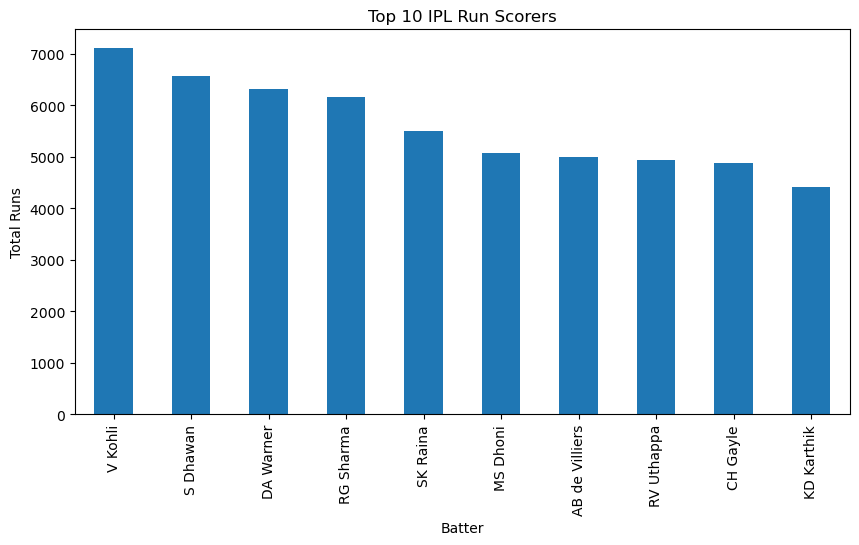

In [55]:
top_scorers.plot(kind='bar', figsize=(10,5), title="Top 10 IPL Run Scorers")
plt.ylabel("Total Runs")
plt.savefig("Top_10_IPL_Run_Scorers.png")
plt.show()

In [38]:
# Best Strike Rates (Min 500 Balls)
print('Best Strike Rates (Min 500 Balls) Top 10')
balls = deliveries.groupby("Batter")["Ball"].count()
runs = deliveries.groupby("Batter")["Batter Runs"].sum()

strike_rate = (runs / balls) * 100
strike_rate = strike_rate[balls > 500].sort_values(ascending=False).head(10)

print(strike_rate)


Best Strike Rates (Min 500 Balls) Top 10
Batter
AD Russell        164.613073
LS Livingstone    157.115385
N Pooran          153.441802
GJ Maxwell        152.383623
SP Narine         151.449275
V Sehwag          149.612403
AB de Villiers    148.309609
SO Hetmyer        146.284224
YBK Jaiswal       145.229244
RR Pant           144.073107
dtype: float64


In [39]:
# Team Win Rate
print('Team Win Rate')
team_wins = matches["winner"].value_counts()
team_matches = matches["team1"].value_counts() + matches["team2"].value_counts()

win_rate = (team_wins / team_matches * 100).sort_values(ascending=False)

print(win_rate)


Team Win Rate
Rising Pune Supergiant         62.500000
Chennai Super Kings            60.305344
Mumbai Indians                 58.598726
Sunrisers Hyderabad            55.263158
Rajasthan Royals               53.389831
Kolkata Knight Riders          52.027027
Royal Challengers Bangalore    48.026316
Kings XI Punjab                47.297297
Gujarat Lions                  43.333333
Kochi Tuskers Kerala           42.857143
Delhi Daredevils               42.176871
Deccan Chargers                38.666667
Rising Pune Supergiants        35.714286
Pune Warriors                  26.086957
Name: count, dtype: float64


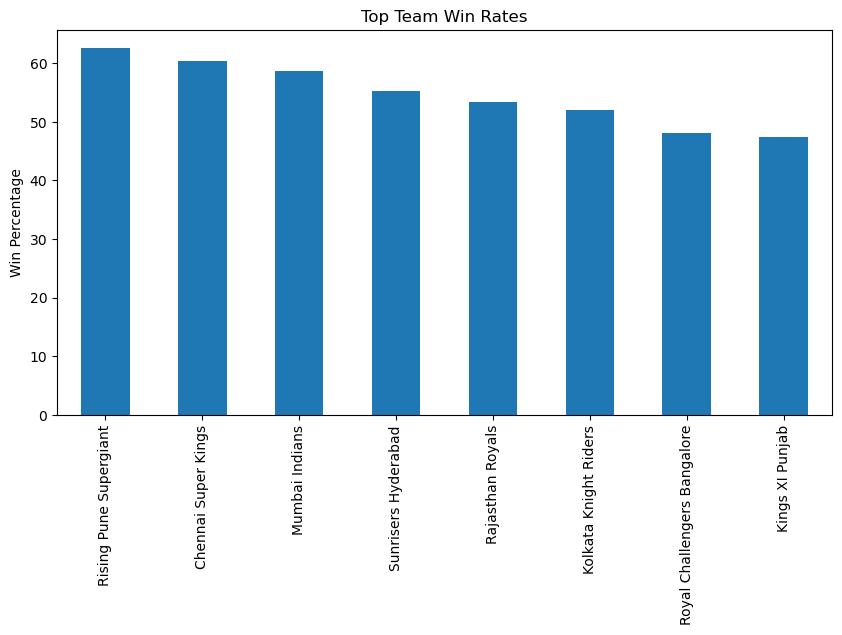

In [58]:
win_rate.head(8).plot(kind="bar", figsize=(10,5), title="Top Team Win Rates")
plt.ylabel("Win Percentage")
plt.savefig("Top_Team_Win_Rates.png")
plt.show()


Season-wise Runs Trend


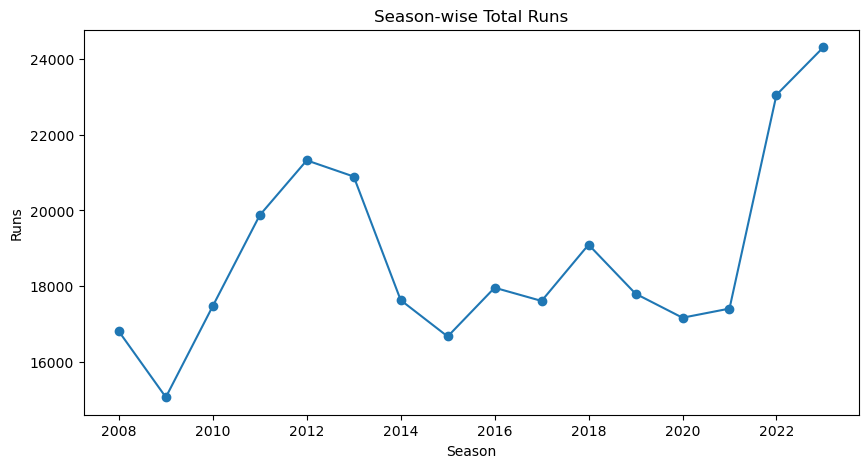

In [42]:
# Season-wise Runs Trend
print('Season-wise Runs Trend')
season_runs = deliveries.groupby("Season")["Batter Runs"].sum()

season_runs.plot(marker='o', figsize=(10,5), title="Season-wise Total Runs")
plt.ylabel("Runs")
plt.show()


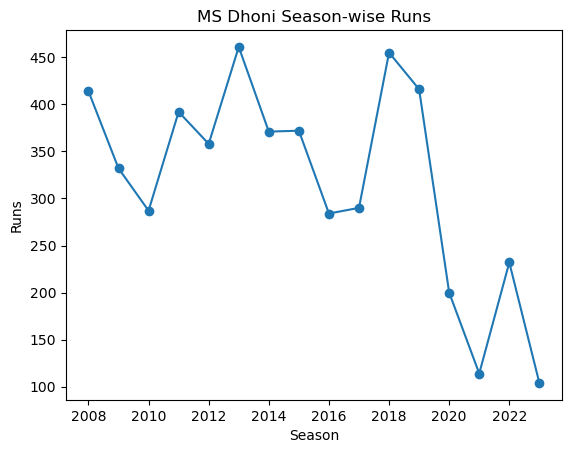

In [48]:
player_season = deliveries[deliveries["Batter"]=="MS Dhoni"] \
    .groupby("Season")["Batter Runs"].sum()

player_season.plot(marker='o', title="MS Dhoni Season-wise Runs")
plt.ylabel("Runs")
plt.savefig("ipl_summary.png", dpi=300, bbox_inches="tight")
plt.show()


In [51]:
summary = pd.DataFrame({
    "Top_Scorer": [top_scorers.index[0]],
    "Top_Scorer_Runs": [top_scorers.iloc[0]],
    "Best_Strike_Rate_Player": [strike_rate.index[0]],
    "Best_Strike_Rate": [strike_rate.iloc[0]],
    "Top_Winning_Team": [win_rate.index[0]],
    "Win_Rate_%": [win_rate.iloc[0]]
})

summary


In [52]:
summary.to_csv("ipl_summary.csv", index=False)


In [53]:
with open("ipl_summary.txt", "w") as file:
    file.write("IPL Data Analysis Summary\n\n")
    file.write(f"Top Scorer: {top_scorers.index[0]} ({top_scorers.iloc[0]} runs)\n")
    file.write(f"Best Strike Rate: {strike_rate.index[0]} ({strike_rate.iloc[0]:.2f})\n")
    file.write(f"Top Winning Team: {win_rate.index[0]} ({win_rate.iloc[0]:.2f}%)\n")
